In [2]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ---------------------------------------- 0.0/

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# dataset location   

data_dir = r"D:\imp files own\6 th sem\mmdp\Assignment\Image Dataset Collection\DivineVision" 

### For finding photos file types

In [ ]:
import os

file_extensions = set()

for root, _, files in os.walk(data_dir):
    for file in files:
        ext = file.split('.')[-1].lower() 
        file_extensions.add(ext)

print("File types found:", file_extensions)


File types found: {'jpg', 'png', 'jpeg', 'gif'}


### for removing unsupported file formats 

In [ ]:
import os
from PIL import Image

# List of supported formats
supported_formats = (".jpg", ".jpeg", ".png", ".gif", ".bmp")

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if not file.lower().endswith(supported_formats):
            print(f"Unsupported file found: {file_path}")
            os.remove(file_path)  # Remove or move the unsupported file



### Converting all files to jpg 

In [13]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img = img.convert("RGB")  # Convert to RGB
                new_file_path = os.path.splitext(file_path)[0] + ".jpg"
                img.save(new_file_path, "JPEG")
                if file_path != new_file_path:
                    os.remove(file_path)  # Remove old file
        except Exception as e:
            print(f"Error processing {file_path}: {e}")


c:\Users\onkar\anaconda3\envs\labwork\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error processing D:\imp files own\6 th sem\mmdp\Assignment\Image Dataset Collection\DivineVision\Krishna God\Image_43.gif: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\imp files own\\6 th sem\\mmdp\\Assignment\\Image Dataset Collection\\DivineVision\\Krishna God\\Image_43.gif'
Error processing D:\imp files own\6 th sem\mmdp\Assignment\Image Dataset Collection\DivineVision\Nataraja God\Image_36.gif: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\imp files own\\6 th sem\\mmdp\\Assignment\\Image Dataset Collection\\DivineVision\\Nataraja God\\Image_36.gif'
Error processing D:\imp files own\6 th sem\mmdp\Assignment\Image Dataset Collection\DivineVision\Shiva God\Image_7.gif: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\imp files own\\6 th sem\\mmdp\\Assignment\\Image Dataset Collection\\DivineVision\\Shiva God\\Image_7.gif'


### For checking corrupted files 

In [14]:
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Check if image is valid
        except Exception as e:
            print(f"Corrupt image found: {file_path}, removing...")
            os.remove(file_path)


###  Reshaping photos and spliting dataset

In [ ]:
# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 10

# Load dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
print("Classes:", class_names)


Found 996 files belonging to 20 classes.
Using 797 files for training.
Found 996 files belonging to 20 classes.
Using 199 files for validation.
Classes: ['Ayyappa God', 'Balaji (Venkateswara) God', 'Bhairava God', 'Dattatreya God', 'Durga Goddess', 'Ganesha God', 'Hanuman God', 'Jagannath God', 'Kali Goddess', 'Kartikeya (Murugan) God', 'Krishna God', 'Lakshmi Goddess', 'Meenakshi Goddess', 'Nataraja God', 'Raghavendra Swami God', 'Ram God', 'Sai Baba God', 'Saraswati Goddess', 'Shiva God', 'Vishwakarma God']


In [25]:
# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Preprocessing layer for normalization
preprocess_input = keras.applications.efficientnet.preprocess_input

# Load EfficientNet model
base_model = keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build classifier
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)
model = keras.Model(inputs, outputs)



In [26]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train model
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 624ms/step - accuracy: 0.0844 - loss: 3.1116 - val_accuracy: 0.2362 - val_loss: 2.5887
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 543ms/step - accuracy: 0.3336 - loss: 2.3919 - val_accuracy: 0.4523 - val_loss: 2.1556
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 559ms/step - accuracy: 0.5317 - loss: 1.9079 - val_accuracy: 0.5276 - val_loss: 1.9030
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 547ms/step - accuracy: 0.5786 - loss: 1.6533 - val_accuracy: 0.5829 - val_loss: 1.7260
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 545ms/step - accuracy: 0.6385 - loss: 1.4519 - val_accuracy: 0.6181 - val_loss: 1.5954
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 550ms/step - accuracy: 0.6797 - loss: 1.3271 - val_accuracy: 0.6382 - val_loss: 1.5137
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 562ms/step - accuracy: 0.7371 - loss: 1.1385 - val_accuracy: 0.6734 - val_loss: 1.4235
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 540ms/step - accuracy: 0.7537 - loss: 1.0588 - val_accu

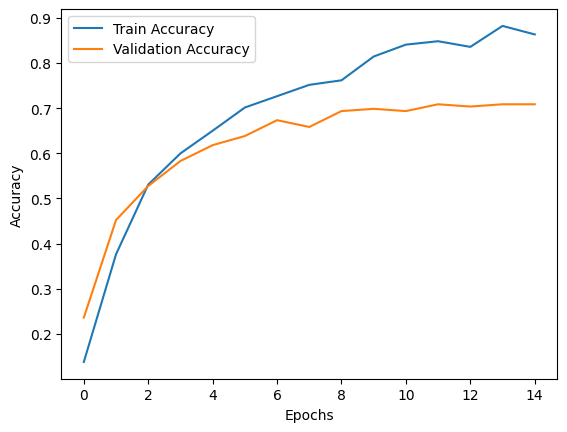

In [35]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.ylim(0, 1) 
plt.show()
